In [2]:
!sudo pip install imutils

/usr/local/lib/python2.7/dist-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:318: SNIMissingWarning: An HTTPS request has been made, but the SNI (Subject Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#snimissingwarning.
  SNIMissingWarning
/usr/local/lib/python2.7/dist-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:122: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning
  Running setup.py 

In [6]:
!curl ftp://ftp.inrialpes.fr/pub/lear/douze/data/INRIAPerson.tar > INRIAPerson.tar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  969M  100  969M    0     0  8931k      0  0:01:51  0:01:51 --:--:-- 8002k


In [7]:
!tar xvf INRIAPerson.tar

INRIAPerson/
INRIAPerson/70X134H96/
INRIAPerson/70X134H96/Test/
INRIAPerson/70X134H96/Test/pos/
INRIAPerson/70X134H96/Test/pos/crop_000001a.png
INRIAPerson/70X134H96/Test/pos/crop_000001b.png
INRIAPerson/70X134H96/Test/pos/crop_000002a.png
INRIAPerson/70X134H96/Test/pos/crop_000002b.png
INRIAPerson/70X134H96/Test/pos/crop_000003a.png
INRIAPerson/70X134H96/Test/pos/crop_000003b.png
INRIAPerson/70X134H96/Test/pos/crop_000004a.png
INRIAPerson/70X134H96/Test/pos/crop_000004b.png
INRIAPerson/70X134H96/Test/pos/crop_000005a.png
INRIAPerson/70X134H96/Test/pos/crop_000005b.png
INRIAPerson/70X134H96/Test/pos/crop_000005c.png
INRIAPerson/70X134H96/Test/pos/crop_000005d.png
INRIAPerson/70X134H96/Test/pos/crop_000006a.png
INRIAPerson/70X134H96/Test/pos/crop_000006b.png
INRIAPerson/70X134H96/Test/pos/crop_000007a.png
INRIAPerson/70X134H96/Test/pos/crop_000007b.png
INRIAPerson/70X134H96/Test/pos/crop_000008a.png
INRIAPerson/70X134H96/Test/pos/crop_000008b.png
INRIAPerson/70X134H96/Test/pos/crop_0000

In [1]:
# import the necessary packages
from __future__ import print_function
from imutils.object_detection import non_max_suppression
from imutils import paths
import numpy as np
import imutils
import cv2

# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [2]:
%matplotlib inline

In [11]:
# import the necessary packages
from __future__ import print_function
from imutils.object_detection import non_max_suppression
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt

# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

from os import listdir
from os.path import isfile, join
mypath = "INRIAPerson/Test/pos/"
onlyfiles = [join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f))]
#print (onlyfiles)
args = {}
args['images'] = onlyfiles
# loop over the image paths

def run():
    cnt = 0
    for imagePath in paths.list_images(mypath):
        # load the image and resize it to (1) reduce detection time
        # and (2) improve detection accuracy
        image = cv2.imread(imagePath)
        image = imutils.resize(image, width=min(400, image.shape[1]))
        orig = image.copy()

        # detect people in the image
        (rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),
            padding=(8, 8), scale=1.05)

        # draw the original bounding boxes
        for (x, y, w, h) in rects:
            cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)

        # apply non-maxima suppression to the bounding boxes using a
        # fairly large overlap threshold to try to maintain overlapping
        # boxes that are still people
        rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
        pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

        # draw the final bounding boxes
        for (xA, yA, xB, yB) in pick:
            cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)

        # show some information on the number of bounding boxes
        filename = imagePath[imagePath.rfind("/") + 1:]
        print("[INFO] {}: {} original boxes, {} after suppression".format(
            filename, len(rects), len(pick)))

        # show the output images
        #cv2.imshow("Before NMS", orig)
        plt.figure()
        plt.axis("off")
        plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
        #cv2.imshow("After NMS", image)
        plt.figure()
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        #cv2.waitKey(0)
        cnt = cnt + 1
        if cnt == 2:
            break

In [26]:
%timeit range(100)

The slowest run took 10.24 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 489 ns per loop


[INFO] person_164.png: 1 original boxes, 1 after suppression
[INFO] person_059.png: 1 original boxes, 1 after suppression


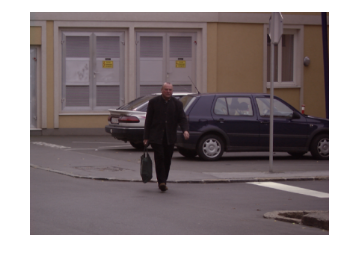

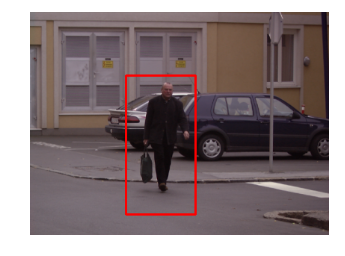

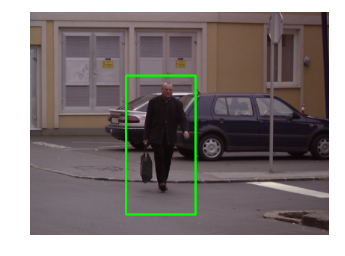

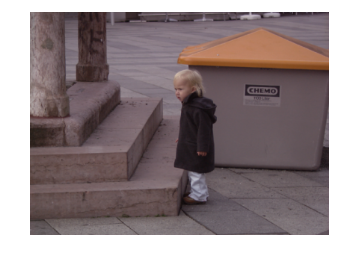

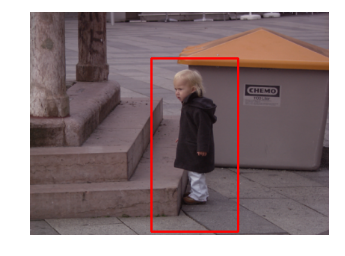

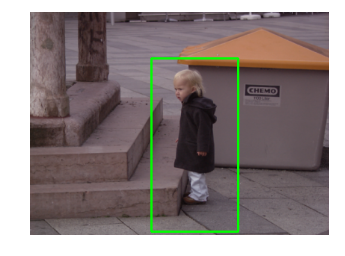

In [12]:
run()

In [6]:
!sudo apt-get install openjdk-7-jre-headless
!java -version

java version "1.7.0_101"
OpenJDK Runtime Environment (IcedTea 2.6.6) (7u101-2.6.6-0ubuntu0.14.04.1)
OpenJDK 64-Bit Server VM (build 24.95-b01, mixed mode)


In [8]:
!curl http://ftp.wayne.edu/apache/spark/spark-1.6.2/spark-1.6.2-bin-hadoop2.6.tgz > spark-1.6.2-bin-hadoop2.6.tgz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  187M  100  187M    0     0  55.0M      0  0:00:03  0:00:03 --:--:-- 55.1M


In [10]:
!tar xvzf spark*

spark-1.6.2-bin-without-hadoop/
spark-1.6.2-bin-without-hadoop/NOTICE
spark-1.6.2-bin-without-hadoop/CHANGES.txt
spark-1.6.2-bin-without-hadoop/python/
spark-1.6.2-bin-without-hadoop/python/run-tests.py
spark-1.6.2-bin-without-hadoop/python/test_support/
spark-1.6.2-bin-without-hadoop/python/test_support/userlibrary.py
spark-1.6.2-bin-without-hadoop/python/test_support/userlib-0.1.zip
spark-1.6.2-bin-without-hadoop/python/test_support/sql/
spark-1.6.2-bin-without-hadoop/python/test_support/sql/people.json
spark-1.6.2-bin-without-hadoop/python/test_support/sql/people1.json
spark-1.6.2-bin-without-hadoop/python/test_support/sql/orc_partitioned/
spark-1.6.2-bin-without-hadoop/python/test_support/sql/orc_partitioned/b=1/
spark-1.6.2-bin-without-hadoop/python/test_support/sql/orc_partitioned/b=1/c=1/
spark-1.6.2-bin-without-hadoop/python/test_support/sql/orc_partitioned/b=1/c=1/part-r-00000-829af031-b970-49d6-ad39-30460a0be2c8.orc
spark-1.6.2-bin-without-hadoop/python/test_support/sql/orc_p

In [12]:
!ln -s spark-1.6.2-bin-without-hadoop spark

In [17]:
!export JAVA_HOME=/usr/lib/jvm/java-7-openjdk-amd64/

In [19]:
!echo $PATH

/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin


In [23]:
!export JAVA_HOME=/usr/lib/jvm/java-7-openjdk-amd64/;spark/bin/run-example SparkPi 10

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
16/07/26 01:45:28 INFO SparkContext: Running Spark version 1.6.2
16/07/26 01:45:29 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
16/07/26 01:45:29 INFO SecurityManager: Changing view acls to: root
16/07/26 01:45:29 INFO SecurityManager: Changing modify acls to: root
16/07/26 01:45:29 INFO SecurityManager: SecurityManager: authentication disabled; ui acls disabled; users with view permissions: Set(root); users with modify permissions: Set(root)
16/07/26 01:45:29 INFO Utils: Successfully started service 'sparkDriver' on port 60252.
16/07/26 01:45:30 INFO Slf4jLogger: Slf4jLogger started
16/07/26 01:45:30 INFO Remoting: Starting remoting
16/07/26 01:45:30 INFO Remoting: Remoting started; listening on addresses :[akka.tcp://sparkDriverActorSystem@172.17.0.2:60747]
16/07/26 01:45:30 INFO Utils: Successfully started service 'sparkDrive